In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# QOQ ANALYSIS (SQL)  - Part 1

## 2.	Visualization

### Analysis of results

In [940]:
qoq_path = './result/task1-QOQ.csv'
df_qoq = pd.read_csv(qoq_path)
df_qoq

,year,quater,country,country_name,site,category,prev_q_visits,next_q_visits,qoq_visits_change
0,16.0,3.0,124.0,Canada,wixsite.com ...,Internet_and_Telecom/Web_Hosting ...,183.076307,9.283342e+05,5069.750115
1,16.0,3.0,124.0,Canada,espn.com ...,News_and_Media/Sports_News ...,4920.584250,5.054592e+06,1026.234165
2,16.0,3.0,124.0,Canada,quizzstar.com ...,Adult ...,472.019797,4.392308e+04,92.053463
3,16.0,3.0,124.0,Canada,wellhello.com ...,Adult ...,16810.335480,9.040682e+05,52.780500
4,16.0,3.0,124.0,Canada,sptslmtrafms.com ...,NaN,67.650817,3.004800e+03,43.416310
...,...,...,...,...,...,...,...,...,...
1050,NaN,NaN,NaN,NaN,brokerbabe.com ...,Adult ...,NaN,NaN,NaN
1051,NaN,NaN,NaN,NaN,t-mobile.com ...,Internet_and_Telecom/Telecommunications ...,NaN,NaN,NaN
1052,NaN,NaN,NaN,NaN,gumtree.com ...,Shopping/Classifieds ...,NaN,NaN,NaN
1053,NaN,NaN,NaN,NaN,irctc.co.in ...,Travel/Tourism ...,NaN,NaN,NaN


In [582]:
df_qoq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               100 non-null    float64
 1   quater             100 non-null    float64
 2   country            100 non-null    float64
 3   country_name       100 non-null    object 
 4   site               1055 non-null   object 
 5   category           955 non-null    object 
 6   prev_q_visits      100 non-null    float64
 7   next_q_visits      100 non-null    float64
 8   qoq_visits_change  100 non-null    float64
dtypes: float64(6), object(3)
memory usage: 74.3+ KB


In [635]:
df_gb_country_category = df_qoq[~df_qoq["quater"].isnull()].groupby(['country_name', 'category']).count()
df_gb_country_category= df_gb_country_category / df_gb_country_category.groupby(level=0).sum()
df_gb_country_category

year  \
country_name                                       category                                                       
Canada                                             Adult                                          ...  0.307692   
                                                   Arts_and_Entertainment                         ...  0.076923   
                                                   Autos_and_Vehicles                             ...  0.076923   
                                                   Business_and_Industry                          ...  0.076923   
                                                   Career_and_Education/Education                 ...  0.153846   
                                                   Games                                          ...  0.076923   
                                                   Internet_and_Telecom/Web_Hosting               ...  0.076923   
                                                   News_and_Media                                 ...  0.076923   
                                                   News_and_Media/Sports_News                     ...  0.076923   
Germany                                            Adult                                          ...  0.363636   
                                                   Business_and_Industry/Marketing_and_Advertising...  0.090909   
                                                   Career_and_Education/Education                 ...  0.090909   
                                                   Internet_and_Telecom                           ...  0.090909   
                                                   Internet_and_Telecom/Search_Engine             ...  0.090909   
                                                   Internet_and_Telecom/Web_Hosting               ...  0.090909   
                                                   News_and_Media/Sports_News                     ...  0.090909   
                                                   Sports                                         ...  0.090909   
Russian Federation                                 Adult                                          ...  0.333333   
                                                   Career_and_Education/Education                 ...  0.166667   
                                                   Finance/Banking                                ...  0.083333   
                                                   Games                                          ...  0.166667   
                                                   Internet_and_Telecom/Email                     ...  0.083333   
                                                   Internet_and_Telecom/Web_Hosting               ...  0.083333   
                                                   News_and_Media/Sports_News                     ...  0.083333   
United Kingdom of Great Britain and Northern Ir... Adult                                          ...  0.285714   
                                                   Arts_and_Entertainment                         ...  0.214286   
                                                   Career_and_Education/Education                 ...  0.142857   
                                                   Computer_and_Electronics/Software              ...  0.071429   
                                                   Finance/Financial_Management                   ...  0.071429   
                                                   Internet_and_Telecom/Search_Engine             ...  0.071429   
                                                   Internet_and_Telecom/Web_Hosting               ...  0.071429   
                                                   News_and_Media/Sports_News                     ...  0.071429   
United States of America                           Adult                                          ...  0.181818   
                                                   Arts_and_Entertainment         

In [941]:
fig = px.bar(df_gb_country_category.reset_index(), x="country_name", color="category",
             y='year',
             title="Most Common Category Per Country",
             barmode='group',
             labels={'year':'Percent', 'country_name':'Country Name'},
             height=700,
             width=1500
            )
fig.show()

In [912]:
df_gb_q_category = df_qoq[~df_qoq["quater"].isnull()].groupby(['year','quater','category']).count()
df_gb_q_category

country  \
year quater category                                                      
16.0 3.0    Adult                                          ...       13   
            Arts_and_Entertainment                         ...        2   
            Business_and_Industry                          ...        1   
            Business_and_Industry/Marketing_and_Advertising...        1   
            Career_and_Education/Education                 ...        2   
            Computer_and_Electronics/Software              ...        1   
            Internet_and_Telecom                           ...        1   
            Internet_and_Telecom/Email                     ...        1   
            Internet_and_Telecom/Search_Engine             ...        1   
            Internet_and_Telecom/Web_Hosting               ...        5   
            News_and_Media/Sports_News                     ...        5   
     4.0    Adult                                          ...        5   
            Arts_and_Entertainment                         ...        3   
            Autos_and_Vehicles                             ...        1   
            Career_and_Education/Education                 ...        9   
            Finance/Banking                                ...        1   
            Finance/Financial_Management                   ...        1   
            Games                                          ...        4   
            Internet_and_Telecom/Search_Engine             ...        1   
            News_and_Media                                 ...        1   
            Shopping                                       ...        1   
            Sports                                         ...        1   

                                                                country_name  \
year quater category                                                           
16.0 3.0    Adult                                          ...            13   
            Arts_and_Entertainment                         ...             2   
            Business_and_Industry                          ...             1   
            Business_and_Industry/Marketing_and_Advertising...             1   
            Career_and_Education/Education                 ...             2   
            Computer_and_Electronics/Software              ...             1   
            Internet_and_Telecom                           ...             1   
            Internet_and_Telecom/Email                     ...             1   
            Internet_and_Telecom/Search_Engine             ...             1   
            Internet_and_Telecom/Web_Hosting               ...             5   
            News_and_Media/Sports_News                     ...             5   
     4.0    Adult                                          ...             5   
            Arts_and_Entertainment                         ...             3   
            Autos_and_Vehicles                             ...             1   
            Career_and_Education/Education                 ...             9   
            Finance/Banking                                ...             1   
            Finance/Financial_Management                   ...             1   
            Games                                          ...             4   
            Internet_and_Telecom/Search_Engine             ...             1   
            News_and_Media                                 ...             1   
            Shopping                                       ...             1   
            Sports                                         ...             1   

                                                                site  \
year quater category                                                   
16.0 3.0    Adult                                          ...    13   
            Arts_and_Entertainment                         ...     2   
            Business_and_Industry                     

In [918]:
fig = px.bar(df_gb_q_category.reset_index(), x="quater", color="category",
             y='site',
             title="Most Common Category Per Quater",
             barmode='group',
             labels={'site':'Ammount', 'quater':'Quater'},
             height=600,
             width=1500
            )
fig.show()

### Analysis of all data

In [944]:
df_site_monthly = pd.read_csv('site_monthly_visits.csv')
df_site_monthly

,site,country,year,month,visits
0,hp.com,276,16,6,1.247095e+06
1,hp.com,840,16,6,9.181335e+06
2,hp.com,276,16,12,1.101527e+06
3,hp.com,826,16,6,1.490688e+06
4,hp.com,643,16,6,9.441161e+05
...,...,...,...,...,...
26880,spankbang.com,840,16,6,8.839860e+06
26881,spankbang.com,124,16,6,1.197933e+06
26882,spankbang.com,643,16,9,4.850187e+05
26883,spankbang.com,276,16,6,4.093033e+05


In [971]:
df_site_category = pd.read_csv('site_category_source.csv')
df_site_category

,site,category
0,hp.com,Computer_and_Electronics/Consumer_Electronics
1,filmweb.pl,Arts_and_Entertainment/Movies
2,chip.de,Computer_and_Electronics
3,tracfone.com,Internet_and_Telecom/Telecommunications
4,gazeta.ru,News_and_Media/Newspapers
...,...,...
995,businessinsider.com,News_and_Media/Business_News
996,nfl.com,Sports/Football
997,freebasics.com,NaN
998,37zw.com,NaN


In [999]:
df_visits = df_site_monthly.groupby(['month','site']).sum()['visits'].unstack()
df_pct_change = df_visits.pct_change().reset_index()
pivot_df  = df_pct_change.pivot_table(columns = 'month').reset_index()
df_change_pct_category = pivot_df.merge(df_site_category, on = 'site')
df_change_pct_category

,site,7,8,9,10,11,12,category
0,028nb.com,0.000000,0.710560,0.000000,-0.464568,-0.618323,0.128480,NaN
1,10010.com,0.039483,0.079943,0.096035,-0.157253,-0.250486,0.113619,Internet_and_Telecom/Telecommunications
2,10086.cn,0.130660,-0.033005,-0.094632,-0.005187,-0.145957,0.241475,Internet_and_Telecom/Telecommunications
3,100msh.com,0.000000,2.732586,-0.271273,-0.039227,-0.823096,4.198469,Shopping
4,11st.co.kr,0.117042,-0.083359,-0.132675,0.075704,0.035074,0.158609,Shopping
...,...,...,...,...,...,...,...,...
793,zippyshare.com,0.013523,0.077249,-0.154985,0.107264,-0.161683,-0.060059,Internet_and_Telecom/File_Sharing
794,zol.com.cn,-0.013935,0.010809,-0.081144,-0.036600,0.043255,-0.147407,News_and_Media/Technology_News
795,zomato.com,0.048199,-0.020304,-0.117745,0.008794,-0.086698,0.044869,Food_and_Drink/Restaurants_and_Delivery
796,zozo.jp,0.380287,-0.098394,-0.101989,0.010716,0.036087,0.054756,Shopping/Clothing


In [1013]:
df_category_change_monthly = df_change_pct_category.groupby('category').mean().reset_index()
df_category_change_monthly

,category,7,8,9,10,11,12
0,Adult,1.289015,0.010261,0.249567,0.152247,-0.057464,0.031901
1,Arts_and_Entertainment,0.226946,0.265114,-0.050756,0.353463,0.121359,0.001241
2,Arts_and_Entertainment/Animation_and_Comics,-0.030140,-0.122689,0.400203,-0.065110,-0.072089,0.014440
3,Arts_and_Entertainment/Celebrities_and_Enterta...,-0.157767,-0.072843,0.122986,-0.072818,0.030808,0.007766
4,Arts_and_Entertainment/Humor,-0.002712,0.000589,-0.099729,0.045029,0.031528,0.037481
...,...,...,...,...,...,...,...
86,Sports/Football,0.149412,1.605723,0.862430,-0.068382,-0.142159,0.006358
87,Sports/Soccer,-0.502370,0.438522,0.201522,0.107588,-0.079435,0.059505
88,Travel,0.089700,-0.002181,-0.138221,-0.060921,0.023838,0.121361
89,Travel/Accommodation_and_Hotels,0.088664,0.002467,-0.168261,0.012128,-0.107793,-0.021698


In [1029]:
import random
random_categories = random.sample(set(df_category_change_monthly["category"]), 10)
df = df_category_change_monthly[df_category_change_monthly['category'].isin(random_categories)].pivot_table(columns = 'category')
df

category,Adult,Autos_and_Vehicles/Automotive_News,Business_and_Industry/Marketing_and_Advertising,Food_and_Drink,Internet_and_Telecom/Telecommunications,News_and_Media/Magazines_and_E-Zines,News_and_Media/Newspapers,Pets_and_Animals/Animal_Products_and_Service,Shopping/Clothing,Shopping/General_Merchandise
7,1.289015,0.062899,-0.089610,0.439802,0.026128,0.041690,0.017855,-0.006719,0.035414,0.056295
8,0.010261,-0.006551,-0.190457,-0.206557,0.067459,-0.020870,-0.055816,-0.260334,-0.007984,0.016820
9,0.249567,-0.045329,-0.027895,0.012281,-0.027222,-0.112767,-0.065709,0.142144,0.000088,-0.077724
10,0.152247,0.094540,-0.195906,-0.144877,0.018427,-0.039029,0.072955,-0.114205,0.069835,0.122574
11,-0.057464,-0.067771,-0.327153,-0.074088,-0.066874,0.002330,0.036096,0.087780,0.314380,0.138730
12,0.031901,-0.038694,-0.423247,0.190253,0.033574,0.149831,-0.061421,0.333994,-0.022743,-0.002504


<AxesSubplot:>

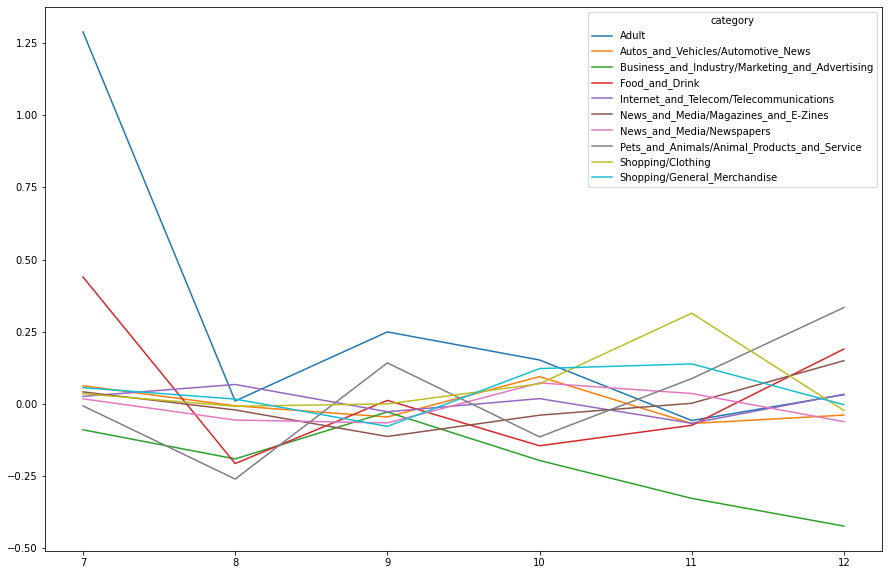

In [1030]:
df.plot(figsize=(15,10))

# VISITS ANALYSIS - PYTHON / SQL - Part 2

In [699]:
df_zoom = pd.read_csv('zoom.us_visits_05_20.csv')
df_zoom.head(3)

,site,country,user,timeonsite,pages,date
0,zoom.us,840,k35kmh1np4kmot8et5so79ft2nn,61432,"[zoom.us/meeting, zoom.us/meeting/87283168826,...",24-05-20
1,zoom.us,840,k35kmh1np4kmot8et5so79ft2nn,62000,"[zoom.us/meeting, zoom.us/meeting/87283168826,...",24-05-20
2,zoom.us,840,9op6jq082jr8ib0957984cj4r0b,330223,"[zoom.us, zoom.us/join, zoom.us/j/9645498612, ...",24-05-20


## zoom info

In [700]:
df_zoom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93107 entries, 0 to 93106
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   site        93107 non-null  object
 1   country     93107 non-null  int64 
 2   user        93106 non-null  object
 3   timeonsite  93107 non-null  int64 
 4   pages       93107 non-null  object
 5   date        93107 non-null  object
dtypes: int64(2), object(4)
memory usage: 4.3+ MB


In [701]:
df_zoom[df_zoom.isna().any(axis=1)]

,site,country,user,timeonsite,pages,date
16536,zoom.us,840,NaN,308541,"[zoom.us/j/9619409880, zoom.us/j/9619409880, z...",10-05-20


In [702]:
print(df_zoom['pages'][0])
print(type(df_zoom['pages'][0]))

[zoom.us/meeting, zoom.us/meeting/87283168826, zoom.us/meeting/87283168826/edit, zoom.us/meeting/87283168826]
<class 'str'>


### Preprocess

In [704]:
df_zoom["pages_list"] = df_zoom["pages"].apply(lambda pages: re.sub('[ \]\[]', '', pages).split(','))
df_zoom["num_uniqe_page"] =  df_zoom["pages_list"].apply(lambda pages: len(set(pages)))
df_zoom.head(2)

,site,country,user,timeonsite,pages,date,pages_list,num_uniqe_page
0,zoom.us,840,k35kmh1np4kmot8et5so79ft2nn,61432,"[zoom.us/meeting, zoom.us/meeting/87283168826,...",24-05-20,"[zoom.us/meeting, zoom.us/meeting/87283168826,...",3
1,zoom.us,840,k35kmh1np4kmot8et5so79ft2nn,62000,"[zoom.us/meeting, zoom.us/meeting/87283168826,...",24-05-20,"[zoom.us/meeting, zoom.us/meeting/87283168826,...",3


### Filter by search word

In [706]:
search_word = 'upgradeSuccess'
df_search = df_zoom[df_zoom.apply(lambda x: any(search_word in page for page in x.pages_list), axis=1)]
df_search

,site,country,user,timeonsite,pages,date,pages_list,num_uniqe_page
296,zoom.us,840,sq3f3rhhnskadskab0rn9prrtmo,606000,"[zoom.us/signin, zoom.us/meeting, zoom.us/sign...",24-05-20,"[zoom.us/signin, zoom.us/meeting, zoom.us/sign...",13
297,zoom.us,840,sq3f3rhhnskadskab0rn9prrtmo,203237,"[zoom.us/signin, zoom.us/meeting, zoom.us/sign...",24-05-20,"[zoom.us/signin, zoom.us/meeting, zoom.us/sign...",11
1310,zoom.us,840,km2h959lkj49p8jl0b80ge93aa5,487000,"[zoom.us, zoom.us/pricing, zoom.us/buy?plan=pr...",24-05-20,"[zoom.us, zoom.us/pricing, zoom.us/buy?plan=pr...",14
1311,zoom.us,840,km2h959lkj49p8jl0b80ge93aa5,487020,"[zoom.us, zoom.us/pricing, zoom.us/buy?plan=pr...",24-05-20,"[zoom.us, zoom.us/pricing, zoom.us/buy?plan=pr...",12
1844,zoom.us,840,149ce60a4bd4a1b1ac875d5fec392c8e5adc4f9d,2147702,"[zoom.us/join, zoom.us/signin, zoom.us/webinar...",09-05-20,"[zoom.us/join, zoom.us/signin, zoom.us/webinar...",17
...,...,...,...,...,...,...,...,...
91938,zoom.us,840,gno7d4kcr6akheeobqe54f2sht5,192000,"[zoom.us/signin, zoom.us/profile, zoom.us/bill...",16-05-20,"[zoom.us/signin, zoom.us/profile, zoom.us/bill...",9
91939,zoom.us,840,dflm516kcf84pa43fato4nedq1k,192587,"[zoom.us/signin, zoom.us/profile, zoom.us/bill...",16-05-20,"[zoom.us/signin, zoom.us/profile, zoom.us/bill...",9
91940,zoom.us,840,dflm516kcf84pa43fato4nedq1k,192000,"[zoom.us/signin, zoom.us/profile, zoom.us/bill...",16-05-20,"[zoom.us/signin, zoom.us/profile, zoom.us/bill...",9
92914,zoom.us,840,js1e2ecop7qq64pe3n6988620im,574301,"[zoom.us/signup, zoom.us/signup, zoom.us/signu...",16-05-20,"[zoom.us/signup, zoom.us/signup, zoom.us/signu...",12


### Metrics 

In [707]:
def number_pages_until_search_word(pages):
    item = next((x for x in pages if search_word in x) , None)
    search_word_index =  len(pages)-1 if item is None else  pages.index(item)    
    return len(set(pages[:search_word_index]) )

In [708]:
# pd.options.mode.chained_assignment = None

In [711]:
df_zoom["num_uniqe_page_until_search_word"] =  df_zoom["pages_list"].apply(number_pages_until_search_word)
df_search["num_uniqe_page_until_search_word"] =  df_search["pages_list"].apply(number_pages_until_search_word)
df_search.head()

,site,country,user,timeonsite,pages,date,pages_list,num_uniqe_page,num_uniqe_page_until_search_word
296,zoom.us,840,sq3f3rhhnskadskab0rn9prrtmo,606000,"[zoom.us/signin, zoom.us/meeting, zoom.us/sign...",24-05-20,"[zoom.us/signin, zoom.us/meeting, zoom.us/sign...",13,8
297,zoom.us,840,sq3f3rhhnskadskab0rn9prrtmo,203237,"[zoom.us/signin, zoom.us/meeting, zoom.us/sign...",24-05-20,"[zoom.us/signin, zoom.us/meeting, zoom.us/sign...",11,8
1310,zoom.us,840,km2h959lkj49p8jl0b80ge93aa5,487000,"[zoom.us, zoom.us/pricing, zoom.us/buy?plan=pr...",24-05-20,"[zoom.us, zoom.us/pricing, zoom.us/buy?plan=pr...",14,8
1311,zoom.us,840,km2h959lkj49p8jl0b80ge93aa5,487020,"[zoom.us, zoom.us/pricing, zoom.us/buy?plan=pr...",24-05-20,"[zoom.us, zoom.us/pricing, zoom.us/buy?plan=pr...",12,7
1844,zoom.us,840,149ce60a4bd4a1b1ac875d5fec392c8e5adc4f9d,2147702,"[zoom.us/join, zoom.us/signin, zoom.us/webinar...",09-05-20,"[zoom.us/join, zoom.us/signin, zoom.us/webinar...",17,9


In [712]:
def exctrac_metrics(df):
    grouped_df = df.groupby("date")
    grouped_df = grouped_df.agg({"pages": "count", "user":"nunique", "num_uniqe_page_until_search_word":"mean"})
    grouped_df = grouped_df.reset_index()
    grouped_df.columns = ['date','num_visits', 'uniqu_users', 'mean_uniqe_page']
    return grouped_df

In [713]:
df_filter_zoom_metrics = exctrac_metrics(df_search.copy())
df_filter_zoom_metrics.head(3)

,date,num_visits,uniqu_users,mean_uniqe_page
0,01-05-20,2,1,5.000000
1,02-05-20,4,2,4.000000
2,03-05-20,6,3,7.166667


In [714]:
df_zoom_metrics = exctrac_metrics(df_zoom.copy())
df_zoom_metrics.head(3)

,date,num_visits,uniqu_users,mean_uniqe_page
0,01-05-20,2999,1088,2.515505
1,02-05-20,2997,1207,2.568569
2,03-05-20,3008,1226,2.612699


In [715]:
df_zoom_metrics.merge(df_filter_zoom_metrics,how='outer', on='date',
          suffixes=('_all', f'_{search_word}'))

,date,num_visits_all,uniqu_users_all,mean_uniqe_page_all,num_visits_upgradeSuccess,uniqu_users_upgradeSuccess,mean_uniqe_page_upgradeSuccess
0,01-05-20,2999,1088,2.515505,2.0,1.0,5.000000
1,02-05-20,2997,1207,2.568569,4.0,2.0,4.000000
2,03-05-20,3008,1226,2.612699,6.0,3.0,7.166667
3,04-05-20,2999,1047,2.548516,3.0,2.0,6.666667
4,05-05-20,2999,1075,2.517839,NaN,NaN,NaN
5,06-05-20,3000,1033,2.586333,NaN,NaN,NaN
6,07-05-20,2999,1054,2.446149,6.0,3.0,9.000000
7,08-05-20,2999,1063,2.516172,1.0,1.0,8.000000
8,09-05-20,2999,1205,2.626209,4.0,2.0,10.500000
9,10-05-20,2999,1274,2.584528,6.0,3.0,7.500000


## 2. cohorts

In [839]:
df_zoom['timeonsite_sec'] = df_zoom['timeonsite']/1000
df_zoom['timeonsite_mins'] = df_zoom['timeonsite_sec']/60
df_zoom.describe()["timeonsite_sec"]

count    93107.000000
mean       337.923103
std        553.945886
min          0.000000
25%          3.546000
50%        302.874000
75%        346.000000
max      10956.490000
Name: timeonsite_sec, dtype: float64

array([[<AxesSubplot:title={'center':'timeonsite_mins'}>]], dtype=object)

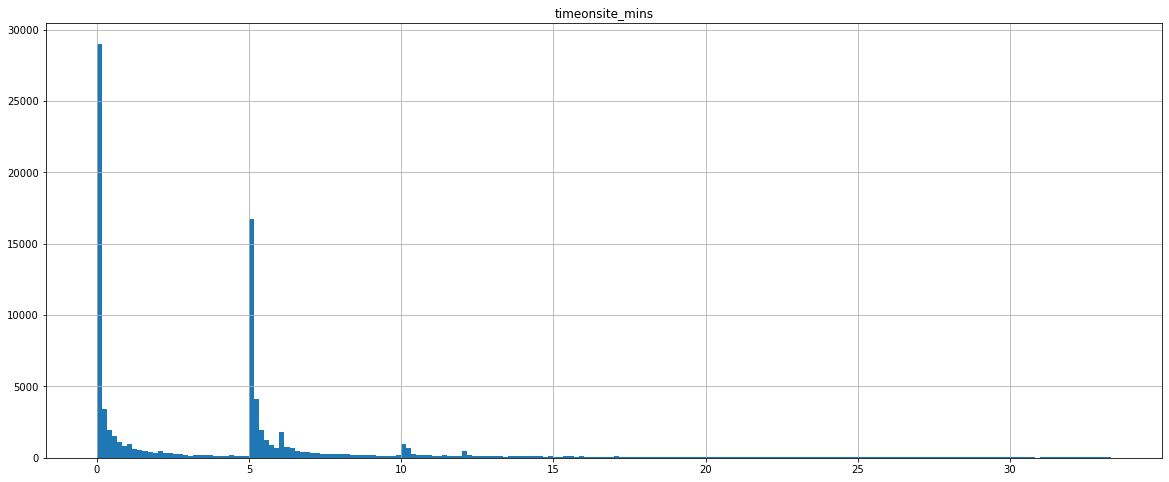

In [840]:
df_zoom[df_zoom["timeonsite_sec"]<2000].hist(column='timeonsite_mins', figsize=(20,8), bins=200)

In [842]:
group_dict = {0:'0 - 300',1:'300 - 600', 2:'600 - 900',3:'900 - 1200',4:'1200 - 1500',5:'1500 - 1800',6:'1800 +'}
def get_group(sec):
    mins = sec/300
    if int(mins)>5:
        return  group_dict[6]
    else:
        return group_dict[int(mins)]

df_zoom["Visit duration cohort"] = df_zoom['timeonsite_sec'].apply(get_group)

In [843]:
cohort_data = df_zoom.groupby('Visit duration cohort').agg({"user":"nunique"}).reset_index()
cohort_data["Share of users"] = round(cohort_data["user"]/cohort_data.iloc[:,1].sum(),3)
cohort_data = cohort_data.rename(columns={"user":"Number of users"})
cohort_data

,Visit duration cohort,Number of users,Share of users
0,0 - 300,17898,0.447
1,1200 - 1500,921,0.023
2,1500 - 1800,795,0.020
3,1800 +,1526,0.038
4,300 - 600,14056,0.351
5,600 - 900,3503,0.088
6,900 - 1200,1308,0.033


In [844]:
cohort_count  = cohort_data.pivot_table(columns = 'Visit duration cohort', values = ["Number of users", "Share of users"])
cohort_count = cohort_count.reindex(['0 - 300','300 - 600', '600 - 900','900 - 1200','1200 - 1500','1500 - 1800','1800 +'], axis=1)
cohort_count

Visit duration cohort,0 - 300,300 - 600,600 - 900,900 - 1200,1200 - 1500,1500 - 1800,1800 +
Number of users,17898.000,14056.000,3503.000,1308.000,921.000,795.00,1526.000
Share of users,0.447,0.351,0.088,0.033,0.023,0.02,0.038


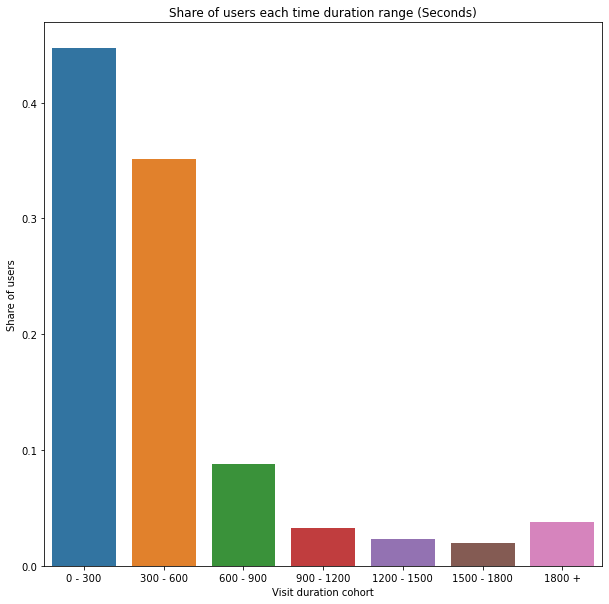

In [887]:
plt.figure(figsize = (10,10))
ax = sns.barplot(data = cohort_count[cohort_count.index =='Share of users'])
ax.set(ylabel='Share of users',title="Share of users each time duration range (Seconds)")
plt.show()

# PYTHON DATA MANIPULATION (part 3)

In [374]:
from urllib.parse import urlparse
from urllib.parse import parse_qs
import re
from collections import Counter

In [375]:
df_bnb = pd.read_csv('airbnb_clickstream_sample.csv')
df_bnb

,Visit Index,UUID,Site,Country,Year,Month,Day,Page Index,Page
0,1,ag8o6trhaqpesg6jeh84ng9hgng,airbnb.com*,840,17,12,31,0,airbnb.com
1,1,ag8o6trhaqpesg6jeh84ng9hgng,airbnb.com*,840,17,12,31,1,airbnb.com/z/q/445417246
2,1,ag8o6trhaqpesg6jeh84ng9hgng,airbnb.com*,840,17,12,31,2,airbnb.com/reservation/itinerary?code=HMZHXTC5K8
3,1,ag8o6trhaqpesg6jeh84ng9hgng,airbnb.com*,840,17,12,31,3,airbnb.com/trips
4,1,ag8o6trhaqpesg6jeh84ng9hgng,airbnb.com*,840,17,12,31,4,airbnb.com/rooms/13302094
...,...,...,...,...,...,...,...,...,...
49962,2666,pcceq1f6hj1orh75r7p54s0fm8e,airbnb.com*,840,17,12,31,1,airbnb.com/s/Fairmont-Le-Ch%C3%A2teau-Frontena...
49963,2666,pcceq1f6hj1orh75r7p54s0fm8e,airbnb.com*,840,17,12,31,2,airbnb.com/s/Fairmont-Le-Ch%C3%A2teau-Frontena...
49964,2666,pcceq1f6hj1orh75r7p54s0fm8e,airbnb.com*,840,17,12,31,3,airbnb.com/s/Fairmont-Le-Ch%C3%A2teau-Frontena...
49965,2666,pcceq1f6hj1orh75r7p54s0fm8e,airbnb.com*,840,17,12,31,4,airbnb.com/s/Fairmont-Le-Ch%C3%A2teau-Frontena...


In [470]:
# ignore_keywords - Keywords meaningless to analyze
ignore_keywords = ['true','false','list','__l-o-c-a-t-i-o-n__']

# airbnb_varsions - fix airbnb keyword to airbnb (all have the same meaning)
airbnb_varsions = ['air b and b', 'airbnb.', 'airbnb.com', 'airbnb\'', 'air bnb', 'airbnb']

# ignore_params - general parameters the user don’t have any access - not user input
general_params = ['section_offset','auth_merge_to','oauth_popup','refinement_path','refinement_paths','refinement_paths[]','oauth2_service', 'source',"place_id" ,'s_tag', 'ib','logo','from_join_success', 's','af','c','search_by_map','code', 'for_reservation_code', 'gclid']

# params_fix - dict to fix params that have multi present versions with the same meaning
params_fix = {'check_in':'checkin', 'check_out':'checkout'}

def is_keyword(param_value):
    # handle with dates: param_value.replace('-','') [it's a business decision]
    if not param_value.replace('-','').isnumeric() and param_value not in ignore_keywords:
        return True
    else:
        return False
    
def clean_keyword(keyword):
    keyword = keyword.lower()
    keyword = keyword.strip()
    if keyword in airbnb_varsions:
        return 'airbnb' 
    return keyword

def clean_param(param):
    if param in params_fix:
        return params_fix[param]
    else:
        return param
    
def get_all_params_keywords(pages):
    params_key = []
    keywords  = []
    number_page_with_params = 0

    for url in pages:
        parsed_url = urlparse(url)
        params = parse_qs(parsed_url.query)
        clean_params = {k: v for k, v in params.items() if k not in general_params}
        if clean_params == {}:
            continue
        number_page_with_params += 1 
        params_key.extend([clean_param(key) for key in clean_params.keys()]) 
        keywords.extend([clean_keyword(value)  for value_list in clean_params.values() for value in value_list if is_keyword(value)] )
    return params_key, keywords, number_page_with_params

params_key, keywords, number_page_with_params = get_all_params_keywords(df_bnb['Page'])

In [471]:
counter_keywords = Counter(keywords)
most_common_keywords = counter_keywords.most_common(20)
most_common_keywords_dict = {key:observed for key, observed in most_common_keywords}
df_most_common_key = pd.DataFrame(most_common_keywords_dict.items(), columns=['keyword', 'observed'])
df_most_common_key["percentage"] = df_most_common_key['observed'] / number_page_with_params
df_most_common_key

,keyword,observed,percentage
0,entire home/apt,10281,0.256224
1,private room,2068,0.051539
2,airbnb,1739,0.043340
3,wishlist_owner,508,0.012660
4,"tokyo, japan",334,0.008324
5,daleray beach,190,0.004735
6,homes_with_location,156,0.003888
7,"los angeles, ca, united states",137,0.003414
8,"nashville, tn",131,0.003265
9,"new orleans, la, united states",122,0.003040


In addition, I think the company is also interested in getting to know the common parameters that users are looking for

In [474]:
counter_params = Counter(params_key)
most_common_params = counter_params.most_common(20)
most_common_params_dict = {param:observed for param, observed in most_common_params}
df_most_common_param = pd.DataFrame(most_common_params_dict.items(), columns=['param', 'observed'])
df_most_common_param["percentage"] = df_most_common_param['observed'] / number_page_with_params
df_most_common_param

,param,observed,percentage
0,checkin,27633,0.688673
1,checkout,26827,0.668586
2,adults,22876,0.570118
3,zoom,21839,0.544274
4,ne_lat,21820,0.543801
5,ne_lng,21820,0.543801
6,sw_lat,21820,0.543801
7,sw_lng,21820,0.543801
8,children,14954,0.372685
9,infants,13393,0.333782
